# Movies: User Rating analysis

**u.data structure**: user id | item id | rating | timestamp

**u.user structure**: user id | age | gender | occupation | zip code

**u.item structure**: movie id | movie title | release date | video release date |IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | Drama | Fantasy |Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi |Thriller | War | Western |

## 1. Standard deviation of ratings by gender

In [20]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# three time modules won't be used that much, nice to have.
%matplotlib inline
import numpy as np
import pandas as pd
import time
from datetime import datetime
from datetime import date
import matplotlib.pyplot as plt

In [3]:
# create a DataFrame from table: u.data
data_names = ['userid','itemid','rating','timestamp']
udata = pd.read_table(r'C:\Users\Zishi\Downloads\ml-100k\u.data',sep='\t',names=data_names)
# create a DataFrame from table: u.user
user_names = ['userid','age','gender','occupation','zipcode']
uuser = pd.read_table(r'C:\Users\Zishi\Downloads\ml-100k\u.user',sep='|',names=user_names)
# merge both dataframes on key "userid"
userdata = pd.merge(uuser,udata,how='inner',on='userid')
# create a new dataframe containing only "gender" and "rating"
genderdata = userdata[['gender','rating']]
# use pivot table to culculate standard deviation
pivot = pd.pivot_table(genderdata,index=['gender'],values=['rating'],aggfunc='std')
pivot

,rating
gender,
F,1.170951
M,1.109556


## 2. Import movie categories

In [6]:
item_names = ['itemid','movietitle','release date','videoreleasedate','IMDbURL']
# for latin1, use: encoding='ISO-8859-1'
uitem = pd.read_table(r'C:\Users\Zishi\Downloads\ml-100k\u.item',sep='|',names=item_names,
                      usecols = range(5),encoding='ISO-8859-1')
movie_ratings = pd.merge(uitem,udata)
lens = pd.merge(movie_ratings,uuser)

In [7]:
most_rated = lens.groupby('movietitle').size().sort_values(ascending=False)[:25]
most_rated

movietitle
Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Back to t

In [9]:
lens.movietitle.value_counts()[:25]

Star Wars (1977)                             583
Contact (1997)                               509
Fargo (1996)                                 508
Return of the Jedi (1983)                    507
Liar Liar (1997)                             485
English Patient, The (1996)                  481
Scream (1996)                                478
Toy Story (1995)                             452
Air Force One (1997)                         431
Independence Day (ID4) (1996)                429
Raiders of the Lost Ark (1981)               420
Godfather, The (1972)                        413
Pulp Fiction (1994)                          394
Twelve Monkeys (1995)                        392
Silence of the Lambs, The (1991)             390
Jerry Maguire (1996)                         384
Chasing Amy (1997)                           379
Rock, The (1996)                             378
Empire Strikes Back, The (1980)              367
Star Trek: First Contact (1996)              365
Titanic (1997)      

In [10]:
movie_stats = lens.groupby('movietitle').agg({'rating': [np.size, np.mean]})
movie_stats.head()

rating          
                            size      mean
movietitle                                
'Til There Was You (1997)      9  2.333333
1-900 (1994)                   5  2.600000
101 Dalmatians (1996)        109  2.908257
12 Angry Men (1957)          125  4.344000
187 (1997)                    41  3.024390

In [11]:
movie_stats.sort_values([('rating','mean')],ascending=False).head()

rating     
                                             size mean
movietitle                                            
They Made Me a Criminal (1939)                  1  5.0
Marlene Dietrich: Shadow and Light (1996)       1  5.0
Saint of Fort Washington, The (1993)            2  5.0
Someone Else's America (1995)                   1  5.0
Star Kid (1997)                                 3  5.0

In [13]:
atleast_100 = movie_stats['rating']['size'] >= 100
movie_stats[atleast_100].sort_values([('rating','mean')],ascending=False)[:15]

rating          
                                         size      mean
movietitle                                             
Close Shave, A (1995)                     112  4.491071
Schindler's List (1993)                   298  4.466443
Wrong Trousers, The (1993)                118  4.466102
Casablanca (1942)                         243  4.456790
Shawshank Redemption, The (1994)          283  4.445230
Rear Window (1954)                        209  4.387560
Usual Suspects, The (1995)                267  4.385768
Star Wars (1977)                          583  4.358491
12 Angry Men (1957)                       125  4.344000
Citizen Kane (1941)                       198  4.292929
To Kill a Mockingbird (1962)              219  4.292237
One Flew Over the Cuckoo's Nest (1975)    264  4.291667
Silence of the Lambs, The (1991)          390  4.289744
North by Northwest (1959)                 179  4.284916
Godfather, The (1972)                     413  4.283293

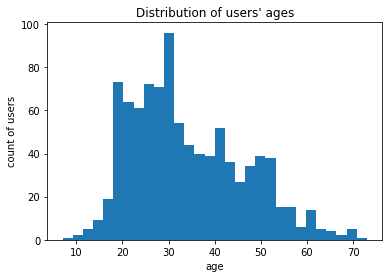

In [21]:
uuser.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');